In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
SEED=42
df = pd.read_csv('students_adaptability_level_online_education1.csv')

In [2]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [3]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [5]:
df.shape

(1205, 14)

In [6]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [7]:
#Making name changes in the data 
df.rename(columns = {'Adaptivity Level': 'Adaptivity_level'},inplace = True)
df.rename(columns = {'Age': 'Age Range'},inplace = True)

df['Gender'] = df['Gender'].replace('Boy','Male')
df['Gender'] = df['Gender'].replace('Girl','Female')
df['Financial Condition'] = df['Financial Condition'].replace("Mid","Middle Class")
df['Financial Condition'] = df['Financial Condition'].replace("Poor","Lower Class")
df['Financial Condition'] = df['Financial Condition'].replace("Rich","Upper Class")

In [8]:
df

,Gender,Age Range,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity_level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle Class,Wifi,4G,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle Class,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Female,16-20,College,Non Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low
1201,Female,16-20,College,Non Government,No,No,High,Middle Class,Wifi,4G,3-6,No,Mobile,Moderate
1202,Male,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Female,16-20,College,Non Government,No,No,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low


# To answer question 1; How are the students adapting to the online learning system

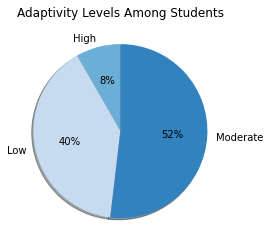

The data shows that only 8% of students adapted highly to online education, over one half did moderately.


In [9]:
import numpy as np
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 3, 0]))

Adapt= df.groupby([  
        'Adaptivity_level'])['Adaptivity_level'].count().to_frame()

plt.pie(Adapt.Adaptivity_level,colors= inner_colors,
        labels = Adapt.index,startangle = 90, autopct = "%1.0f%%", 
        explode = None, shadow = True)
plt.title("Adaptivity Levels Among Students")
plt.show()
print('The data shows that only 8% of students adapted highly to online education, over one half did moderately.')

# Question 2 : What are the relationships between the independent variables measured and adaptivity?

In [10]:
#As id be grouping a lot of categories to test relationship
 #A function will be recreated for ease
  # the function returns each category grouped by tables

def create_groups(
    df: pd.DataFrame, var1: str, 
    var2: str)->pd.DataFrame:
    
    category = df.groupby([var1,var2])[var2].count().to_frame()
    
    print('Adaptivity_level' + ' by ' + var1)
    
    return category

In [11]:
#lets test the function with education level 

create_groups(df, 'Education Level', 'Adaptivity_level')

Adaptivity_level by Education Level


Adaptivity_level
Education Level Adaptivity_level                  
College         High                             3
                Low                            120
                Moderate                        96
School          High                            47
                Low                            182
                Moderate                       301
University      High                            50
                Low                            178
                Moderate                       228

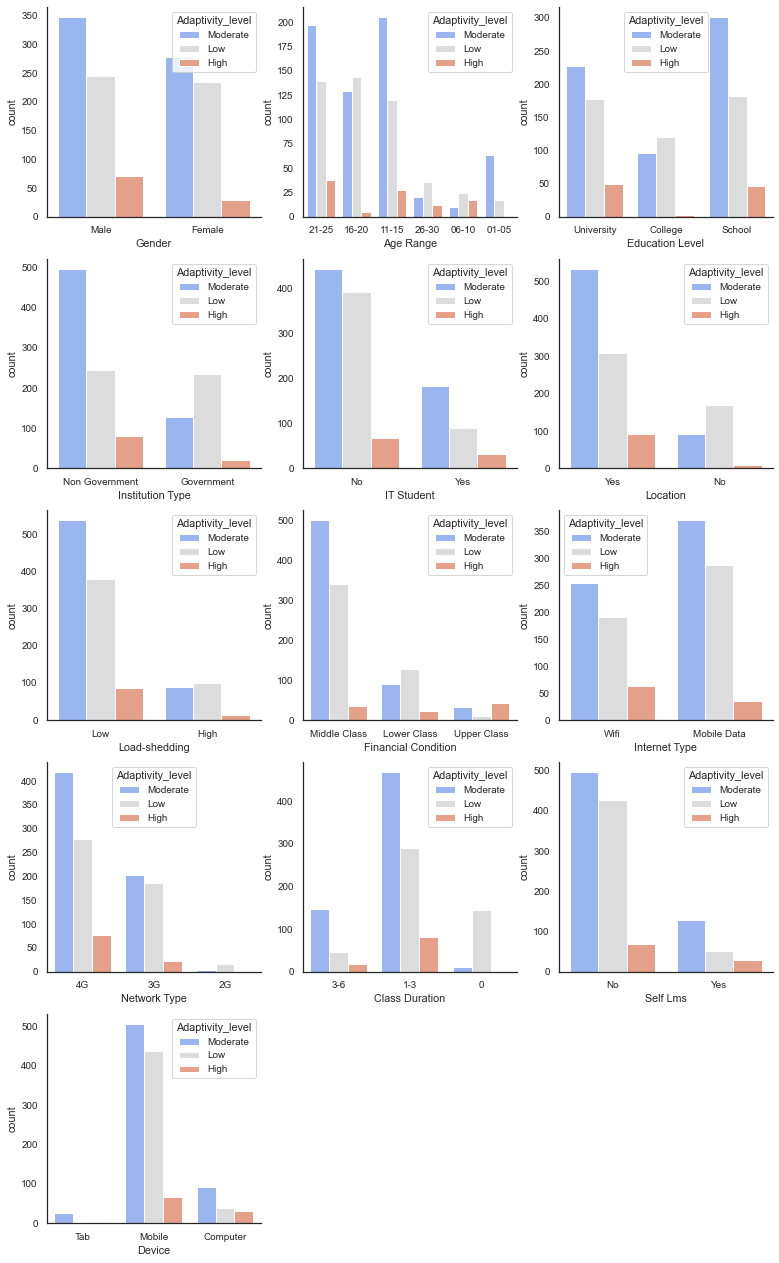

In [12]:
#to create barplot visualizations for the different categories 
i = 1
plt.figure(figsize=(13, 27))
sns.set(font_scale= 0.9)
sns.set_style('white')

for feature in [col for col in df.columns if col!='Adaptivity_level' ]:
    plt.subplot(6,3,i),
    sns.countplot(x = feature , hue='Adaptivity_level', data = df, palette = 'coolwarm')

 
    i +=1
sns.despine() 

# What factors are most important in predicting the adaptivity levels of the students?

# Feature Scaling (Normalization/Standardization)

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
#since the age comes as a range and is a string, python will automatically sort by alphabetical order
#to be able to sort numerically,id split the range and use the lower limit instead 
col1 = df["Age Range"].apply(lambda x: x.split("-")[0])
df1 = df.join(col1.to_frame(name="Lower Limit Age"))
df1.drop(['Age Range'], axis = 1, inplace = True)
df1

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity_level,Lower Limit Age
0,Male,University,Non Government,No,Yes,Low,Middle Class,Wifi,4G,3-6,No,Tab,Moderate,21
1,Female,University,Non Government,No,Yes,High,Middle Class,Mobile Data,4G,1-3,Yes,Mobile,Moderate,21
2,Female,College,Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Moderate,16
3,Female,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,4G,1-3,No,Mobile,Moderate,11
4,Female,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,3G,0,No,Mobile,Low,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Female,College,Non Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low,16
1201,Female,College,Non Government,No,No,High,Middle Class,Wifi,4G,3-6,No,Mobile,Moderate,16
1202,Male,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,3G,1-3,No,Mobile,Moderate,11
1203,Female,College,Non Government,No,No,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low,16


In [15]:
#will change to integer too 
df1['Lower Limit Age'] = df1['Lower Limit Age'].astype(int)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Encoding the data - Before training the model, we need to make sure the data is in a form that the model can understand
# Use Label Encoder for all features with 2 classes
le = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    print(x, df[x].unique())
    df[x]= le.fit_transform(df[x])

Gender ['Male' 'Female']
Institution Type ['Non Government' 'Government']
IT Student ['No' 'Yes']
Location ['Yes' 'No']
Load-shedding ['Low' 'High']
Internet Type ['Wifi' 'Mobile Data']
Self Lms ['No' 'Yes']


In [18]:
scaler = OrdinalEncoder()
names = df1.columns
d = scaler.fit_transform(df1)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head(10)

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity_level,Lower Limit Age
0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,4.0
1,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,4.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,3.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,2.0
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0
5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0
6,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0
7,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0
8,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0
9,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
X = scaled_df.drop(['Adaptivity_level'],axis = 1)
y = scaled_df['Adaptivity_level']

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(964, 13)
(964,)
(241, 13)
(241,)


In [23]:
#testing 5 models to find the best one 
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),DecisionTreeClassifier()]
d={}

for a in models:
    a.fit(X_train, y_train)
    y_pred = a.predict(X_test)

    print(f'model: {str(a)}')
    print(classification_report(y_test,y_pred, zero_division=1, target_names=["High","Low","Moderate"]))
    
    print(a,":",accuracy_score(y_test,y_pred))
    d.update({str(a):a.score(X_test,y_test)})
    
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

        High       0.88      0.65      0.75        23
         Low       0.89      0.94      0.92       103
    Moderate       0.90      0.90      0.90       115

    accuracy                           0.89       241
   macro avg       0.89      0.83      0.85       241
weighted avg       0.89      0.89      0.89       241

RandomForestClassifier() : 0.8921161825726142
------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

        High       0.79      0.48      0.59        23
         Low       0.85      0.74      0.79       103
    Moderate       0.74      0.89      0.81       115

    accuracy                           0.78       241
   macro avg       0.79      0.70      0.73       241
weighted avg       0.79      0.78      0.78       241

KNeighborsClassifier() : 0.7842323651452282
------------------------------ 

model: SVC()
       

In [24]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print('Classification Report:')
print(classification_report(y_test, y_pred))

print('RandomForestClassifier():', model.score(X_test,y_test))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.65      0.75        23
         1.0       0.89      0.94      0.92       103
         2.0       0.90      0.90      0.90       115

    accuracy                           0.89       241
   macro avg       0.89      0.83      0.85       241
weighted avg       0.89      0.89      0.89       241

RandomForestClassifier(): 0.8921161825726142


Text(0.5, 13.5, 'Predicted')

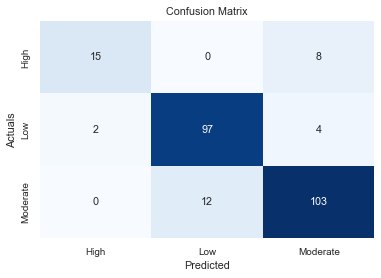

In [25]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(conf_mat,
                     index = ["High","Low","Moderate"], 
                     columns = ["High","Low","Moderate"])

sns.heatmap(conf_mat_df, cmap='Blues',annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')        
plt.ylabel('Actuals')
plt.xlabel('Predicted')

# Random Forest

In [26]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,3)

param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10)

In [27]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  13,  16,  19,  22,  25,  28,  31,  34,  37,  40,  43,  46,
        49,  52,  55,  58,  61,  64,  67,  70,  73,  76,  79,  82,  85,
        88,  91,  94,  97, 100, 103, 106, 109, 112, 115, 118, 121, 124,
       127, 130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163,
       166, 169, 172, 175, 178, 181, 184, 187, 190, 193, 196, 199, 202,
       205, 208])})

In [28]:
print('The best parameters are %s with a score of %0.2f' % (grid.best_params_,grid.best_score_))

The best parameters are {'max_features': 4, 'n_estimators': 115} with a score of 0.91


In [29]:
grid.best_estimator_

RandomForestClassifier(max_features=4, n_estimators=115)

In [30]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred,target_names=["High","Low","Moderate"]))

              precision    recall  f1-score   support

        High       0.88      0.65      0.75        23
         Low       0.93      0.94      0.94       103
    Moderate       0.90      0.94      0.92       115

    accuracy                           0.91       241
   macro avg       0.91      0.84      0.87       241
weighted avg       0.91      0.91      0.91       241



In [31]:
grid.score(X_test,y_test)

0.9128630705394191

Text(0.5, 13.5, 'Predicted')

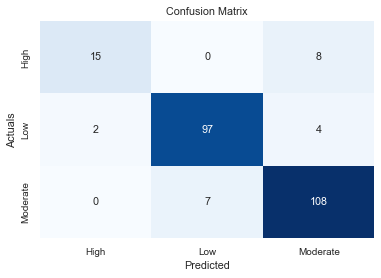

In [32]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(conf_mat,
                     index = ["High","Low","Moderate"], 
                     columns = ["High","Low","Moderate"])

sns.heatmap(conf_mat_df, cmap='Blues',annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')        
plt.ylabel('Actuals')
plt.xlabel('Predicted')

In [33]:
# Creating the feature importances dataframe
feature_importance = np.array(best_model.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

Text(0.5, 1.0, 'Important Features')

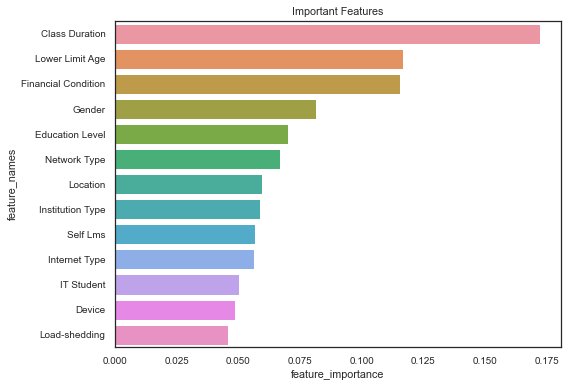

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])

plt.title("Important Features")

In [69]:
# Choose a random row from X_test
my_features = X_test.iloc[np.random.randint(100, len(X_test))]
own_pred = best_model.predict(my_features.to_numpy().reshape(1,-1))
print("My prediction is {}.".format([own_pred[0]]))
print("This was the input data:")
print(my_features)

My prediction is [2.0].
This was the input data:
Gender                 1.0
Education Level        2.0
Institution Type       0.0
IT Student             0.0
Location               0.0
Load-shedding          0.0
Financial Condition    0.0
Internet Type          0.0
Network Type           2.0
Class Duration         2.0
Self Lms               0.0
Device                 1.0
Lower Limit Age        4.0
Name: 605, dtype: float64


C:\Users\chai_\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# KNN

In [36]:
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 17
Best p: 1
Best n_neighbors: 1


In [41]:
best_model.best_estimator_

KNeighborsClassifier(leaf_size=17, n_neighbors=1, p=1)

In [44]:
KNN_Model=best_model.best_estimator_

y_pred = KNN_Model.predict(X_test)
print(classification_report(y_test, y_pred,target_names=["High","Low","Moderate"]))
print()
print('KNeighborsClassifier():', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.90      0.83      0.86        23
         Low       0.95      0.87      0.91       103
    Moderate       0.88      0.96      0.92       115

    accuracy                           0.91       241
   macro avg       0.91      0.89      0.90       241
weighted avg       0.91      0.91      0.91       241


KNeighborsClassifier(): 0.9087136929460581


Text(0.5, 13.5, 'Predicted')

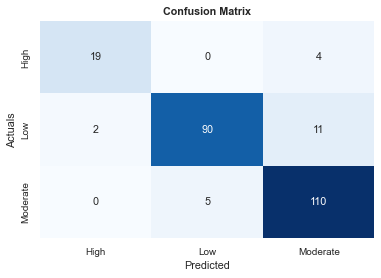

In [45]:
# Plot the confusion matrix using Seaborn library

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(conf_mat,
                     index = ["High","Low","Moderate"], 
                     columns = ["High","Low","Moderate"])

sns.heatmap(conf_mat_df, cmap='Blues',annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix', fontweight='bold')        
plt.ylabel('Actuals')
plt.xlabel('Predicted')


In [46]:
# Kept aside some data to test - X_test

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

compare_df[:10]

,Desired Output (Actuals),Predicted Output
101,2.0,2.0
946,2.0,2.0
306,2.0,2.0
109,0.0,0.0
1061,2.0,2.0
1176,0.0,0.0
630,2.0,2.0
49,1.0,1.0
479,2.0,2.0
924,0.0,0.0


In [47]:
# List out the first twenty or less missed predictions
compared_bool = compare_df['Desired Output (Actuals)'] != compare_df['Predicted Output']
df_missed = compare_df[compared_bool]
df_missed[:10]

,Desired Output (Actuals),Predicted Output
998,1.0,2.0
617,1.0,0.0
432,0.0,2.0
314,2.0,1.0
842,1.0,2.0
323,1.0,2.0
113,2.0,1.0
220,2.0,1.0
1116,2.0,1.0
844,0.0,2.0


# SVM

In [60]:
# defining parameter range
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_grid = GridSearchCV(SVC(), svm_param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.663 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.528 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.902 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.813 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.808 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.834 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.771 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.710 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [61]:

# print best parameter after tuning
print(svm_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(svm_grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [64]:
SVM_Model=svm_grid.best_estimator_

y_pred = SVM_Model.predict(X_test)

# print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=["High","Low","Moderate"]))
print()
print('SVM Classifier():', accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.65      0.75        23
         Low       0.90      0.94      0.92       103
    Moderate       0.90      0.90      0.90       115

    accuracy                           0.90       241
   macro avg       0.89      0.83      0.86       241
weighted avg       0.90      0.90      0.89       241


SVM Classifier(): 0.8962655601659751


In [51]:
# Kept aside some data to test - X_test
y_pred = svm_grid.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [52]:
compare_df[:10]

,Desired Output (Actuals),Predicted Output
101,2.0,1.0
946,2.0,2.0
306,2.0,2.0
109,0.0,2.0
1061,2.0,2.0
1176,0.0,0.0
630,2.0,1.0
49,1.0,1.0
479,2.0,2.0
924,0.0,2.0


Text(0.5, 13.5, 'Predicted')

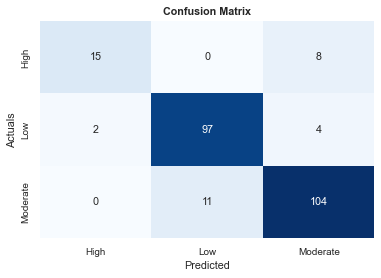

In [53]:
# Plot the confusion matrix using Seaborn library

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(conf_mat,
                     index = ["High","Low","Moderate"], 
                     columns = ["High","Low","Moderate"])

sns.heatmap(conf_mat_df, cmap='Blues',annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix', fontweight='bold')        
plt.ylabel('Actuals')
plt.xlabel('Predicted')


In [54]:
# List out the first twenty or less missed predictions
compared_bool = compare_df['Desired Output (Actuals)'] != compare_df['Predicted Output']
df_missed = compare_df[compared_bool]
df_missed[:10]

,Desired Output (Actuals),Predicted Output
101,2.0,1.0
109,0.0,2.0
630,2.0,1.0
924,0.0,2.0
998,1.0,2.0
617,1.0,0.0
432,0.0,2.0
451,0.0,2.0
422,2.0,1.0
1166,2.0,1.0


# LogisticRegression

In [55]:
# Import the logistic regression algorithm
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=5000)

# Train the model
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [56]:
# Kept aside some data to test - X_test
y_pred = classifier.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [57]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred,target_names=["High","Low","Moderate"]))
print()

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Classification report:

              precision    recall  f1-score   support

        High       1.00      0.09      0.16        23
         Low       0.76      0.63      0.69       103
    Moderate       0.64      0.86      0.74       115

    accuracy                           0.69       241
   macro avg       0.80      0.53      0.53       241
weighted avg       0.73      0.69      0.66       241


Confusion Matrix:


array([[ 2,  4, 17],
       [ 0, 65, 38],
       [ 0, 16, 99]], dtype=int64)

Text(0.5, 13.5, 'Predicted')

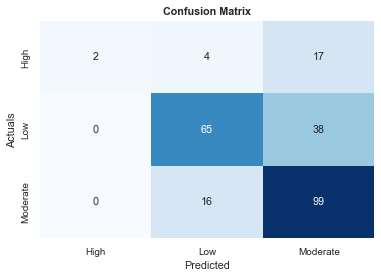

In [58]:
# Plot the confusion matrix using Seaborn library

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(conf_mat,
                     index = ["High","Low","Moderate"], 
                     columns = ["High","Low","Moderate"])

sns.heatmap(conf_mat_df, cmap='Blues',annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix', fontweight='bold')        
plt.ylabel('Actuals')
plt.xlabel('Predicted')


In [59]:
# List out the first twenty or less missed predictions
compared_bool = compare_df['Desired Output (Actuals)'] != compare_df['Predicted Output']
df_missed = compare_df[compared_bool]
df_missed[:10]

,Desired Output (Actuals),Predicted Output
109,0.0,1.0
1176,0.0,2.0
630,2.0,1.0
49,1.0,2.0
924,0.0,1.0
998,1.0,2.0
155,1.0,2.0
802,1.0,2.0
1169,1.0,2.0
617,1.0,2.0
